# DATA 601 Project
    Domestic Movie Analysis from 1972-2023 – Have Domestic Films Gotten Worse? 
    
#### By: 
* Brian Englum
* Tyler Snow
* Joel Wheaton
* Kumar Pasupuleti

> **Purpose:**
> * Many movie fans and film critics believe that U.S. domestic movies have deteriorated in quality over time. Classic blockbusters like "The Godfather," "The Terminator," the Star Wars Episodes IV-VI seem to be a thing of the past. Studios and producers appear to be more interested in making animations; plot-absent, visually entertaining films; and never-ending sequels than making truly original, creative films. 
> * Although viewers and critics may feel this way, little research has been done on the topic.
> * The goal of this project is to use statistical analysis and data science tools to explore this topic and come to a conclusion, one way or another.  

## First Steps

In [565]:
# Imports
import pandas as pd
import csv
import numpy
import plotly.express as px

In [566]:
# Prevent warning messages from appearing.
import warnings
warnings.filterwarnings("ignore")

In [567]:
# Create initial DataFrame from movie_data.csv
df = pd.read_csv('movie_data.csv')
print(f'This dataset has {df.shape[0]} movies.' )
df.sample(1)

This dataset has 16328 movies.


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
8610,Death of a Salesman,1985.0,Drama,7.2,100,NaN,6.9,"11,889",Won 3 Primetime Emmys. 7 wins & 12 nominations...,NaN,movie,Volker Schlöndorff,United States


## I: Data Cleaning

### Step 1) Restrict years used from 1972 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

In [570]:
df = df[(df['Year'] >= 1972.0) & (df['Year'] <= 2023.0)]

### Step 2) Remove '$' and ',' char's from the GDBOS column values and turns them into <<float>>.

In [572]:
df['Gross Domestic Box Office Sales ($)'] = df['Gross Domestic Box Office Sales ($)'].astype(str).apply(lambda x: ''.join([char for char in x if char not in ['$',',']])).astype(float)
df.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
14362,Cabin Fever,2003.0,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN


### Step 3) Create a DataFrame (df_movie_ratings) that allows data analysis of movie rating metrics.
- Change rating system values from str to float.
- Drop NaN values.

In [574]:
# Changes rating system values (EXCEPT RT) from str to float.

df['IMDB'] = df['IMDB'].astype(float)
df['Metacritic'] = df['Metacritic'].astype(float)
df['TMDB'] = df['TMDB'].astype(float)

# Assigns 'None' to invalid RT ratings, i.e. '31/10' and etc, and removes them in df_movie_ratings.    

def clean_rotten_tom(rtg):
    if type(rtg) is str:
        if '/' in rtg:
            return None
        else: 
            return rtg
    else: 
        return rtg

print("Number of movies BEFORE removing 'bad' RT ratings:", df.shape[0])

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(clean_rotten_tom)
df_RT = df.dropna(subset='Rotten Tomatoes')

print("Number of movies AFTER removing 'bad' RT ratings:", df_RT.shape[0])

df_RT['Rotten Tomatoes'] = df_RT['Rotten Tomatoes'].astype(float)

df.sample(1)

Number of movies BEFORE removing 'bad' RT ratings: 16001
Number of movies AFTER removing 'bad' RT ratings: 11053


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
4317,Anamorph,2007.0,"Crime, Horror, Thriller",5.4,27,43.0,5.1,"9,861",1 win,6950.0,movie,Henry Miller,United States


## Special Note:
- The main API used in this project, OMDB API, returns invalid RT rating for over **5000 movies** (see above for reference).  
- As a result, in order to effectively remove movies without RT but not remove those movies possessing ratings from the other metrics, RT will be analyzed separately in some data visualizations.

## II: Data Visualization

### A. Movie Ratings as a Function of Time (in years)

#### Step 1) Group movie data by year and then use aggregation to find averages per metric per year.

In [578]:
# Group by year and find average ratings per metric per year.

df_groupby_year_no_RT = df.groupby("Year").aggregate({
    'IMDB':'mean',
    'Metacritic':'mean',
    'TMDB':'mean'})

df_groupby_year_no_RT = df_groupby_year_no_RT.reset_index()

df_groupby_year_with_RT = df_RT.groupby("Year").aggregate({
    'Rotten Tomatoes': 'mean',
    })

df_groupby_year_with_RT = df_groupby_year_with_RT.reset_index()

#### Step 2) Plot (4) line graphs containing movie ratings per metric as a function of time, in years.

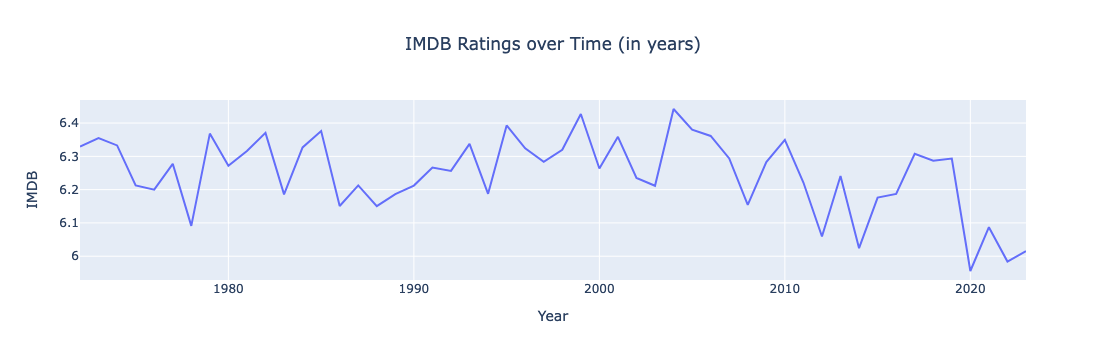

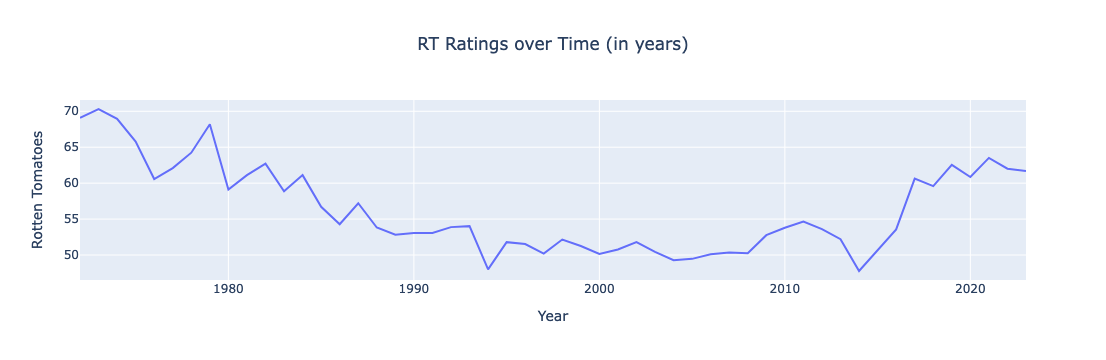

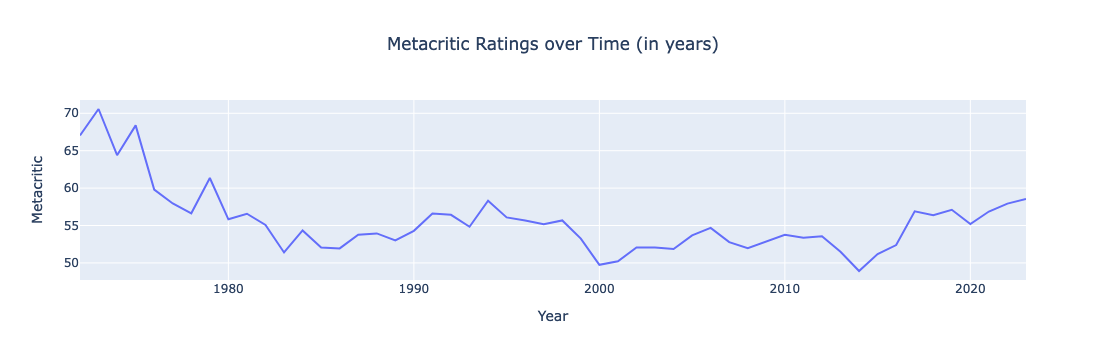

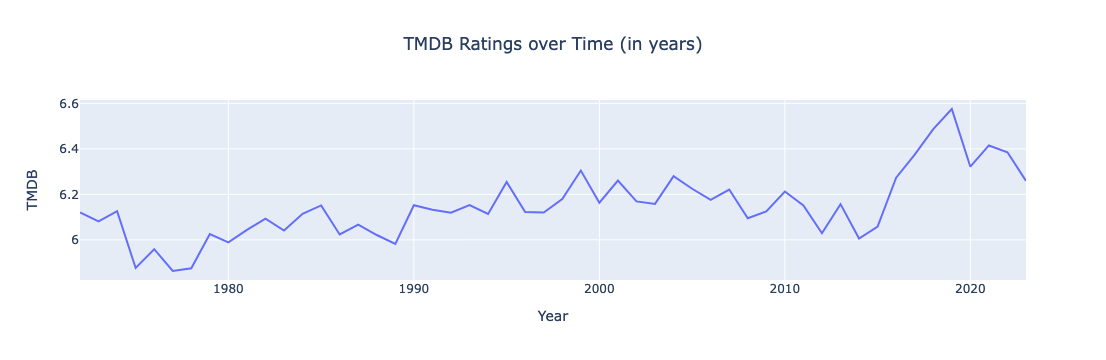

In [580]:
# Plot movie ratings per metric per year.

fig1 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'IMDB',
    title='IMDB Ratings over Time (in years)'
)

fig2 = px.line(
    df_groupby_year_with_RT,
    x = 'Year',
    y = 'Rotten Tomatoes',
    title='RT Ratings over Time (in years)'
)

fig3 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'Metacritic',
    title='Metacritic Ratings over Time (in years)'
)

fig4 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'TMDB',
    title='TMDB Ratings over Time (in years)'
)
fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

fig1.show()
fig2.show()
fig3.show()
fig4.show()
    

### B. Movie Ratings **(by genre)** as a Function of Time (in years)

#### Step 1) Drop all movies that have NaN in 'Genre(s)' column.

In [583]:
df_genres = df.copy()
print("Number of movies BEFORE removing those without genres:", df_genres['Genre(s)'].shape[0])
df_genres = df_genres.dropna(subset='Genre(s)')
print("Number of movies AFTER removing those without genres:", df_genres['Genre(s)'].shape[0])

df_genres_RT = df_RT.copy()
df_genres_RT = df_genres_RT.dropna(subset='Genre(s)')

Number of movies BEFORE removing those without genres: 16001
Number of movies AFTER removing those without genres: 14289


#### Step 2) Simplify grouping of genres among movies in dataset.
- As seen below, there are 696 combinations of over 20 different genres.
- This will make displaying data in this topic difficult if not impossible.
- Therefore, we will try to reduce 696 combinations to 18 exclusive genres.

In [585]:
df_genres['Genre(s)'].value_counts()

Genre(s)
Drama                             738
Comedy                            607
Comedy, Drama, Romance            596
Comedy, Drama                     514
Drama, Romance                    432
                                 ... 
Drama, Family, War                  1
Comedy, Family, Horror              1
Musical, Romance, Western           1
Documentary, Family, Game-Show      1
Drama, Thriller, Western            1
Name: count, Length: 689, dtype: int64

#### Step 3) Create function that does the following:
- Classifies movies containing the following genres in their lists of genres:
    - 'Comedy, Action, Drama, Horror, Documentary, Animation, War, Fantasy, Crime, Musical, Adventure, Family, Thriller, Short, Sport, Musical, Music, Romance'
    - The list is also a hierarchy.  The function will first check if "Comedy" is in a movie's list of genres.  If so, its genre will be labeled ONLY "Comedy," and so on and so forth.


In [587]:
# Labels movies to a single genre.
def classify_genre(genres):

    # Creates clean list of genres from str of genres.
    genres_list = genres.strip().split(',')

    # Cleans individual terms.  (Some terms have spaces before or after word and causes bugs in the program.)
    for i in range(1, len(genres_list)):
        genres_list[i] = genres_list[i].strip()

    genre_types = ['Comedy',
                   'Action',
                   'Drama',
                   'Horror',
                   'Documentary',
                   'Animation',
                   'War',
                   'Fantasy',
                   'Crime',
                   'Musical',
                   'Adventure',
                   'Family',
                   'Thriller',
                   'Short',
                   'Sport',
                   'Musical',
                   'Music',
                   'Romance'
                  ]
    # Labels movies to a single genre.                  
    for genre_type in genre_types:
        if genre_type in genres_list:
            return genre_type


#### Step 4) Apply function to "Genre(s)" column.

In [589]:
df_genres.reset_index()
df_genres_RT.reset_index()

df_genres['Genre(s)'] = df_genres['Genre(s)'].apply(str).apply(classify_genre)

df_genres_RT['Genre(s)'] = df_genres_RT['Genre(s)'].apply(str).apply(classify_genre)

#### Step 5) Group dataset by 'Year' and 'Genre(s)' and calculate means of movie rating metrics.

In [591]:
df_groupby_genres = df_genres.groupby(['Year','Genre(s)']).aggregate(
    {'IMDB': 'mean',
     'Metacritic': 'mean',
     'TMDB': 'mean'
    }
)

df_groupby_genres_RT = df_genres_RT.groupby(['Year','Genre(s)']).aggregate(
    {'Rotten Tomatoes': 'mean'}
)
df_groupby_genres.reset_index().sample(5)

,Year,Genre(s),IMDB,Metacritic,TMDB
384,2010.0,Music,8.166667,NaN,7.100000
455,2017.0,Thriller,4.700000,NaN,6.100000
167,1989.0,Crime,5.550000,NaN,5.300000
496,2021.0,Family,NaN,NaN,6.700000
368,2009.0,Drama,6.578906,57.767442,6.385625


#### Step 6) Further simplify list of genres displayed. 
- In order to reduce the list, what are the four most common genres?
- Answer: comedy, drama, action, and horror.

In [593]:
# Question: What are the most frequent genre(s)?
# Answer: Comedy, Drama, Action, and Horror
df_genres['Genre(s)'].value_counts()


Genre(s)
Comedy         5293
Drama          4674
Action         2247
Horror          871
Documentary     586
Fantasy         102
Thriller         99
Crime            95
Animation        84
Short            65
Adventure        52
Musical          21
Music            15
Family            9
War               7
Romance           6
Sport             3
Name: count, dtype: int64

#### Step 7) Isolate the (4) genres in the dataset.

In [595]:
df_groupby_genres2 = df_groupby_genres.reset_index()
df_groupby_genres2 = df_groupby_genres2[
    (df_groupby_genres2['Genre(s)'] == 'Drama') | 
    (df_groupby_genres2['Genre(s)'] == "Action") | 
    (df_groupby_genres2['Genre(s)'] == "Comedy") | 
    (df_groupby_genres2['Genre(s)'] == "Horror")
]

df_groupby_genres_RT_2 = df_groupby_genres_RT.reset_index()
df_groupby_genres_RT_2 = df_groupby_genres_RT_2[
    (df_groupby_genres_RT_2['Genre(s)'] == 'Drama') | 
    (df_groupby_genres_RT_2['Genre(s)'] == "Action") | 
    (df_groupby_genres_RT_2['Genre(s)'] == "Comedy") | 
    (df_groupby_genres_RT_2['Genre(s)'] == "Horror")
]

#### Step 8) Plot movie ratings (by genre) per metric per year.

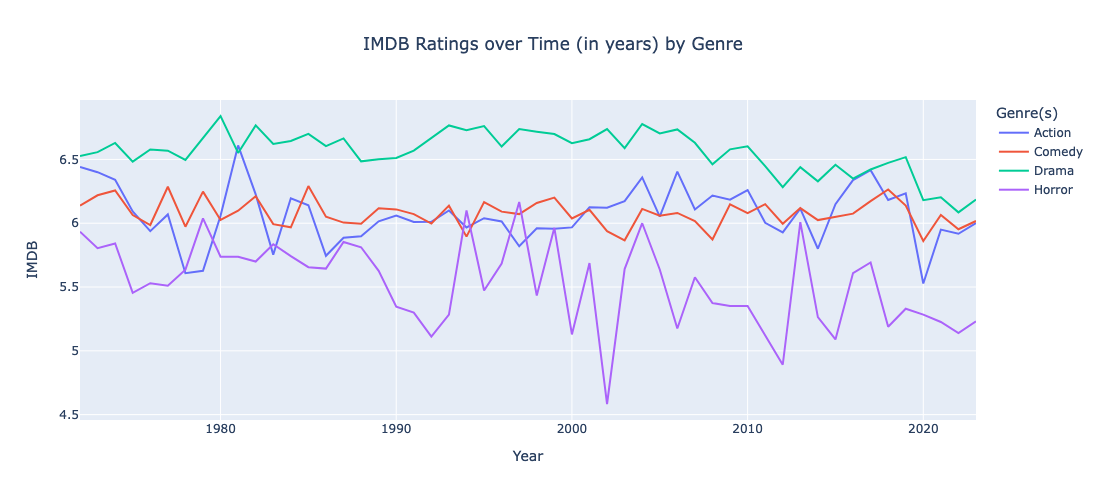

In [597]:
# Plot IMDB movie ratings by genre per year.

fig1 = px.line(
    df_groupby_genres2,
    x = 'Year',
    y = 'IMDB',
    color = 'Genre(s)',
    title='IMDB Ratings over Time (in years) by Genre',
    height = 500
)
fig1.update_layout(title_x = .5)
fig1.show()

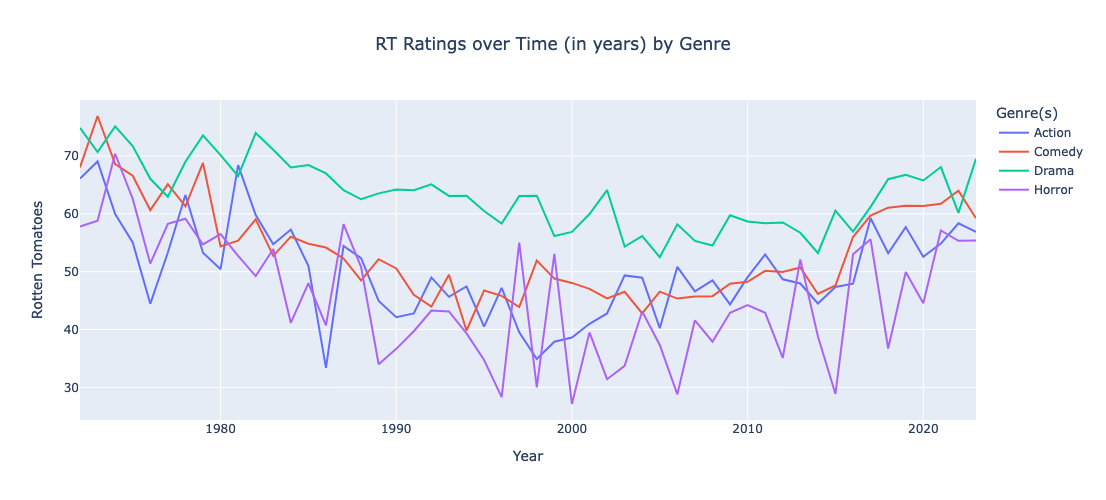

In [598]:
# Plot RT movie ratings by genre per year.
fig2 = px.line(
     df_groupby_genres_RT_2,
     x = 'Year',
     y = 'Rotten Tomatoes',
     color = 'Genre(s)',
     title='RT Ratings over Time (in years) by Genre',
     height = 500
)

fig2.update_layout(title_x = .5)
fig2.show()

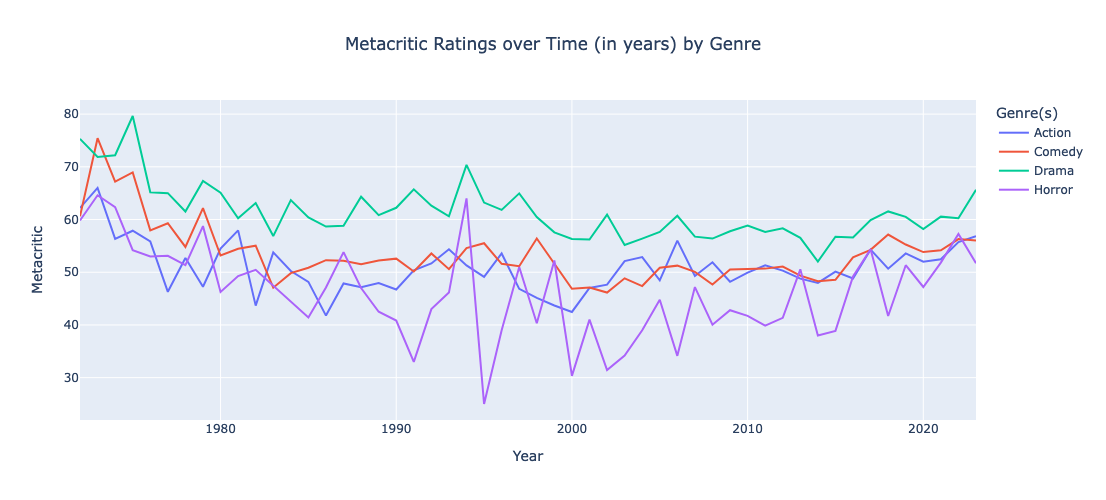

In [599]:
# Plot Metacritic movie ratings by genre per year.
fig3 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'Metacritic',
     color = 'Genre(s)',
     title='Metacritic Ratings over Time (in years) by Genre ',
     height = 500
)

fig3.update_layout(title_x = .5)
fig3.show()

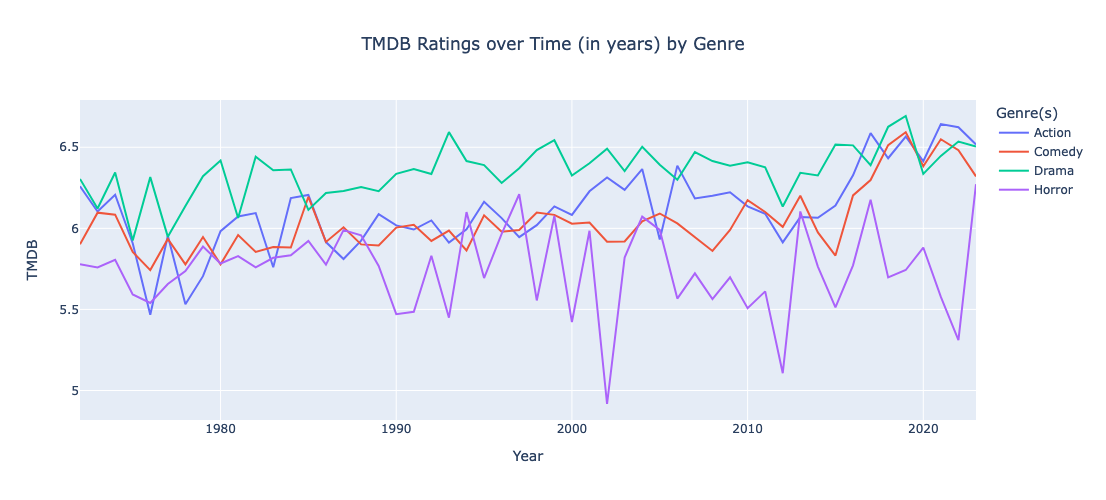

In [600]:
# Plot TMDB movie ratings by genre per year.
fig4 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'TMDB',
     color = 'Genre(s)',
     title='TMDB Ratings over Time (in years) by Genre',
     height = 500
)

fig4.update_layout(title_x = .5)
fig4.show()

### C. Total Gross Domestic Box Office Sales (GDBOS) By Year, Adjusted for Inflation

#### Step 1) Drop all movies that have NaN in GDBOS column.

In [603]:
df_GDBOS = df.dropna(subset=['Gross Domestic Box Office Sales ($)'])

print(f'A total of {df.shape[0]-df_GDBOS.shape[0]} movies were removed.')

A total of 6696 movies were removed.


#### Step 2) Group movies by year and sum the GDBOS for each movie in that year.

In [605]:

df_GDBOS_by_year = df_GDBOS.groupby('Year')['Gross Domestic Box Office Sales ($)'].sum().reset_index()
df_GDBOS_by_year.sample(1)

,Year,Gross Domestic Box Office Sales ($)
44,2016.0,1.010340e+10


#### Step 3) 
- Create function to calculate inflation and convert USD in given a year to the USD in 2023.
- Apply function to dataset.

In [607]:
# Define function to convert the GDBOS for a year and calculate the USD value in year 2023.
ANNUAL_INFLATION_RATE = .04
LAST_YEAR = 2023

def get_today_GDBOS(row):
  release_year = row['Year']
  years_elapsed = LAST_YEAR - release_year
  release_year_GDBOS = row['Gross Domestic Box Office Sales ($)']

  # Returns USD value in 2023 using the formula T = P[(1+r)**n - 1] where:
  # T = USD value in 2023
  # P = USD value at year of movie release
  # r = average annual inflation rate
  # n = number of years elapsed
  return release_year_GDBOS * (((1 + ANNUAL_INFLATION_RATE) ** years_elapsed)-1)

# Apply function to calculate USD value (in 2023) for total GDBOS by year
df_GDBOS_by_year_with_inflation = df_GDBOS_by_year.copy()
df_GDBOS_by_year_with_inflation['Gross Domestic Box Office Sales ($)'] = df_GDBOS_by_year.apply(get_today_GDBOS, 1)
df_GDBOS_by_year_with_inflation.rename(columns={'Gross Domestic Box Office Sales ($)': 'Total GDBOS ($ in 2023)'}, inplace=True)
df_GDBOS_by_year_with_inflation.sample(5)

,Year,Total GDBOS ($ in 2023)
24,1996.0,1.068847e+10
51,2023.0,0.000000e+00
5,1977.0,8.661807e+09
11,1983.0,9.983621e+09
29,2001.0,1.103834e+10


#### Step 4) Plot bar graph displaying total GDBOS by year, adjusted for inflation through year 2023.

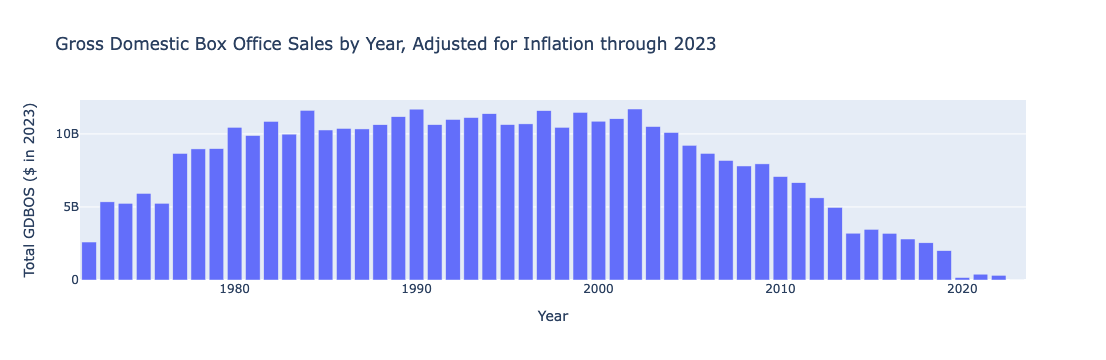

In [609]:
# Create bar graph displaying the total GDBOS by year, adjusted for inflation through year 2023.
fig = px.bar(
    df_GDBOS_by_year_with_inflation,
    x = 'Year',
    y = 'Total GDBOS ($ in 2023)',
    title = 'Gross Domestic Box Office Sales by Year, Adjusted for Inflation through 2023'
)
fig.show()

# TO DO:

- Add annotations showing why lack of data from 2014 on.
- Add meaningful annotations to all graphs.
- Finding which movies were removed from dataset may explain this.
- Also, keep in mind streaming services became very popular around 2018, and these movies do not have GDBOS.
- See notes in write up